In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
from scipy.cluster import hierarchy as sch
from matplotlib import pyplot as plt
from copy import deepcopy
%matplotlib inline

In [2]:
adata = sc.read_h5ad('../../../Desktop/scRNA/breast_cancer/local.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 714331 × 33234
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'donor_BMI_at_collection', 'suspension_uuid', 'suspension_type', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'cell_state', 'disease_ontology_term_id', 'sex_ontology_term_id', 'n_count_rna', 'n_feature_rna', 'percent_mito', 'percent_rb', 'source', 'tissue_location', 'bmi', 'group', 'age2', 'celltype', 'sample_id', 'density2', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: 'default_embedding', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'

In [4]:
adata.obs

,donor_id,self_reported_ethnicity_ontology_term_id,organism_ontology_term_id,sample_uuid,sample_preservation_method,tissue_ontology_term_id,development_stage_ontology_term_id,donor_BMI_at_collection,suspension_uuid,suspension_type,...,sample_id,density2,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage
r1_hbca_c01_AACCATGGTATGCTTG,P01,HANCESTRO:0005,NCBITaxon:9606,c4a63080-974c-4eb1-9c40-7c6f93f65de6,n/a (fresh),UBERON:0000310,HsapDv:0000204,25-29.9,e9720f23-92d3-4c36-8660-b80c2f1df382,cell,...,hbca_c01,low,luminal epithelial cell of mammary gland,10x 3' v2,breast cancer,Homo sapiens,female,breast,European,mature stage
r1_hbca_c01_ACGGAGACAAGCTGTT,P01,HANCESTRO:0005,NCBITaxon:9606,c4a63080-974c-4eb1-9c40-7c6f93f65de6,n/a (fresh),UBERON:0000310,HsapDv:0000204,25-29.9,e9720f23-92d3-4c36-8660-b80c2f1df382,cell,...,hbca_c01,low,luminal epithelial cell of mammary gland,10x 3' v2,breast cancer,Homo sapiens,female,breast,European,mature stage
r1_hbca_c01_ACTGATGGTCATCGGC,P01,HANCESTRO:0005,NCBITaxon:9606,c4a63080-974c-4eb1-9c40-7c6f93f65de6,n/a (fresh),UBERON:0000310,HsapDv:0000204,25-29.9,e9720f23-92d3-4c36-8660-b80c2f1df382,cell,...,hbca_c01,low,luminal epithelial cell of mammary gland,10x 3' v2,breast cancer,Homo sapiens,female,breast,European,mature stage
r1_hbca_c01_AGGTCATGTGCACCAC,P01,HANCESTRO:0005,NCBITaxon:9606,c4a63080-974c-4eb1-9c40-7c6f93f65de6,n/a (fresh),UBERON:0000310,HsapDv:0000204,25-29.9,e9720f23-92d3-4c36-8660-b80c2f1df382,cell,...,hbca_c01,low,luminal epithelial cell of mammary gland,10x 3' v2,breast cancer,Homo sapiens,female,breast,European,mature stage
r1_hbca_c01_CAGCCGAAGATATGCA,P01,HANCESTRO:0005,NCBITaxon:9606,c4a63080-974c-4eb1-9c40-7c6f93f65de6,n/a (fresh),UBERON:0000310,HsapDv:0000204,25-29.9,e9720f23-92d3-4c36-8660-b80c2f1df382,cell,...,hbca_c01,low,luminal epithelial cell of mammary gland,10x 3' v2,breast cancer,Homo sapiens,female,breast,European,mature stage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hbca_c150_hbca_c150_TTTATGCCACAATGTC-1,P109,HANCESTRO:0005,NCBITaxon:9606,6eb56453-fb44-4f95-8380-9022862638b3,n/a (fresh),UBERON:0000310,HsapDv:0000204,30-34.9,0dba13c9-1d5b-4d8f-a7a5-dae8aa44cabb,cell,...,hbca_c150,unknown,pericyte,10x 3' v3,normal,Homo sapiens,female,breast,European,mature stage
hbca_c150_hbca_c150_TTTCCTCAGGTATTGA-1,P109,HANCESTRO:0005,NCBITaxon:9606,6eb56453-fb44-4f95-8380-9022862638b3,n/a (fresh),UBERON:0000310,HsapDv:0000204,30-34.9,0dba13c9-1d5b-4d8f-a7a5-dae8aa44cabb,cell,...,hbca_c150,unknown,vascular associated smooth muscle cell,10x 3' v3,normal,Homo sapiens,female,breast,European,mature stage
hbca_c150_hbca_c150_TTTGATCGTGTTACAC-1,P109,HANCESTRO:0005,NCBITaxon:9606,6eb56453-fb44-4f95-8380-9022862638b3,n/a (fresh),UBERON:0000310,HsapDv:0000204,30-34.9,0dba13c9-1d5b-4d8f-a7a5-dae8aa44cabb,cell,...,hbca_c150,unknown,pericyte,10x 3' v3,normal,Homo sapiens,female,breast,European,mature stage
hbca_c150_hbca_c150_TTTGATCTCGAGAGAC-1,P109,HANCESTRO:0005,NCBITaxon:9606,6eb56453-fb44-4f95-8380-9022862638b3,n/a (fresh),UBERON:0000310,HsapDv:0000204,30-34.9,0dba13c9-1d5b-4d8f-a7a5-dae8aa44cabb,cell,...,hbca_c150,unknown,vascular associated smooth muscle cell,10x 3' v3,normal,Homo sapiens,female,breast,European,mature stage


In [11]:
adata.obs['disease'].value_counts()

normal           570046
breast cancer    144285
Name: disease, dtype: int64

In [12]:
adata.obs['self_reported_ethnicity'].value_counts()

African American              364625
European                      241791
unknown                        55506
Hispanic or Latin American     47968
Asian                           4441
Name: self_reported_ethnicity, dtype: int64

In [5]:
adata.var

,feature_is_filtered,feature_name,feature_reference,feature_biotype
ENSG00000243485,False,MIR1302-2HG,NCBITaxon:9606,gene
ENSG00000237613,False,FAM138A,NCBITaxon:9606,gene
ENSG00000186092,False,OR4F5,NCBITaxon:9606,gene
ENSG00000238009,False,RP11-34P13.7,NCBITaxon:9606,gene
ENSG00000239945,False,RP11-34P13.8,NCBITaxon:9606,gene
...,...,...,...,...
ENSG00000277856,False,ENSG00000277856.1,NCBITaxon:9606,gene
ENSG00000275063,False,ENSG00000275063.1,NCBITaxon:9606,gene
ENSG00000271254,False,ENSG00000271254.6,NCBITaxon:9606,gene
ENSG00000277475,False,ENSG00000277475.1,NCBITaxon:9606,gene


In [9]:
adata.var.value_counts()

feature_is_filtered  feature_name             feature_reference  feature_biotype
False                A1BG                     NCBITaxon:9606     gene               1
                     RP11-219A15.2            NCBITaxon:9606     gene               1
                     RP11-21L23.4             NCBITaxon:9606     gene               1
                     RP11-21L23.3             NCBITaxon:9606     gene               1
                     RP11-21L1.1              NCBITaxon:9606     gene               1
                                                                                   ..
                     IGHV3-74                 NCBITaxon:9606     gene               1
                     IGHV3-73                 NCBITaxon:9606     gene               1
                     IGHV3-72                 NCBITaxon:9606     gene               1
                     IGHV3-71                 NCBITaxon:9606     gene               1
True                 TMSB15B_ENSG00000269226  NCBITaxon:960

In [10]:
adata.var['feature_biotype'].value_counts()

gene    33234
Name: feature_biotype, dtype: int64

In [13]:
adata

AnnData object with n_obs × n_vars = 714331 × 33234
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'donor_BMI_at_collection', 'suspension_uuid', 'suspension_type', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'cell_state', 'disease_ontology_term_id', 'sex_ontology_term_id', 'n_count_rna', 'n_feature_rna', 'percent_mito', 'percent_rb', 'source', 'tissue_location', 'bmi', 'group', 'age2', 'celltype', 'sample_id', 'density2', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: 'default_embedding', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'

In [14]:
adata.obs['celltype'].value_counts()

fibroblasts    208390
basal          102228
vascular        83651
tcells          76567
lumhr           75247
lumsec          63329
pericytes       52638
myeloid         30789
bcells          12510
lymphatic        8982
Name: celltype, dtype: int64

In [15]:
adata.obs['cell_type'].value_counts()

fibroblast                                         208390
luminal epithelial cell of mammary gland           104415
basal cell                                         102228
vein endothelial cell                               41460
mammary gland epithelial cell                       34161
capillary endothelial cell                          29272
vascular associated smooth muscle cell              27928
CD4-positive helper T cell                          24782
pericyte                                            24710
CD8-positive, alpha-beta memory T cell              19213
endothelial cell of artery                          12919
alternatively activated macrophage                   9059
endothelial cell of lymphatic vessel                 8982
inflammatory macrophage                              8853
effector memory CD8-positive, alpha-beta T cell      7303
IgA plasma cell                                      5233
CD4-positive, alpha-beta T cell                      5199
effector memor

C:\Users\DouglasHannumJr\anaconda3\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


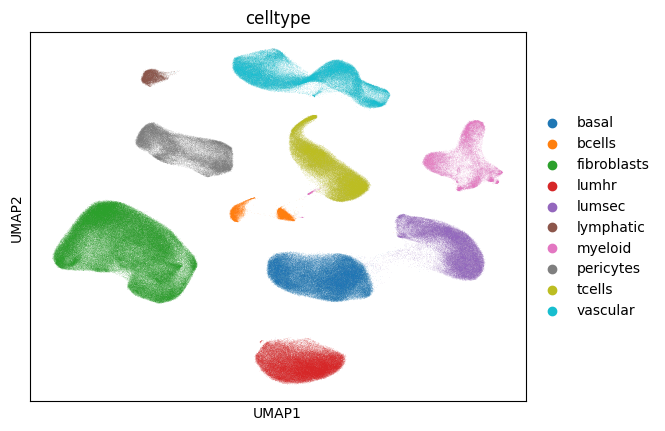

In [19]:
sc.pl.umap(adata, color = 'celltype')

C:\Users\DouglasHannumJr\anaconda3\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


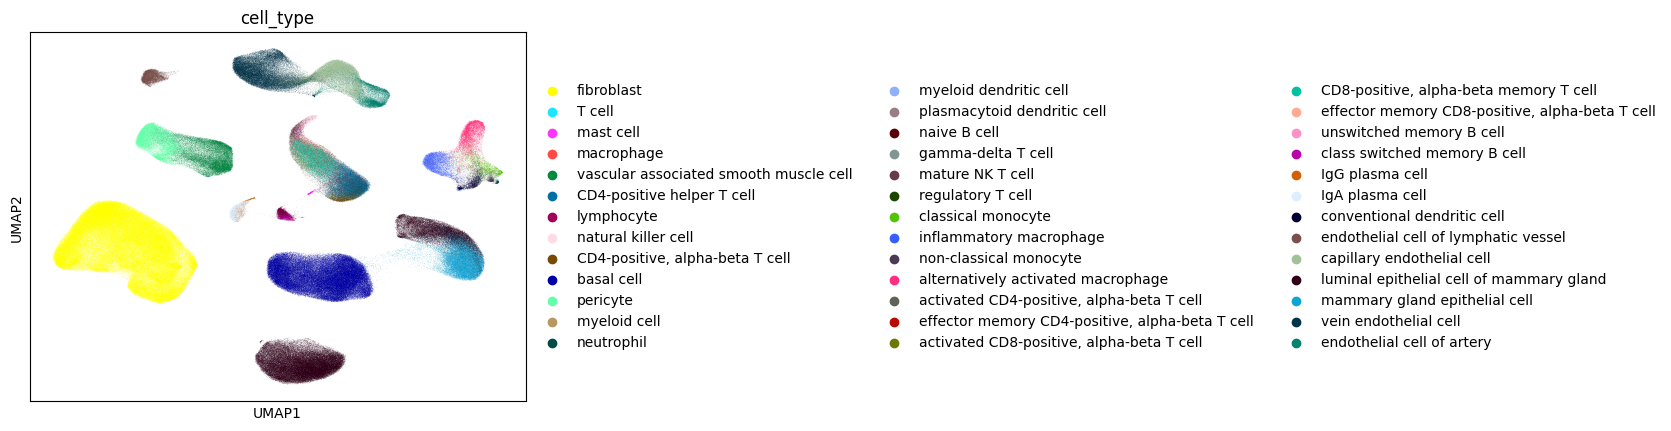

In [20]:
sc.pl.umap(adata, color = 'cell_type')

In [34]:
adata.var['feature_name']

ENSG00000243485          MIR1302-2HG
ENSG00000237613              FAM138A
ENSG00000186092                OR4F5
ENSG00000238009         RP11-34P13.7
ENSG00000239945         RP11-34P13.8
                         ...        
ENSG00000277856    ENSG00000277856.1
ENSG00000275063    ENSG00000275063.1
ENSG00000271254    ENSG00000271254.6
ENSG00000277475    ENSG00000277475.1
ENSG00000268674    ENSG00000268674.2
Name: feature_name, Length: 33234, dtype: category
Categories (33234, object): ['A1BG', 'A1BG-AS1', 'A1CF', 'A2M', ..., 'ZZZ3', 'bP-21264C1.2', 'bP-2171C21.3', 'hsa-mir-1253']

In [21]:
viz = pd.read_csv('../data/vz-ffpe-showcase/HumanBreastCancerPatient1/HumanBreastCancerPatient1_cell_by_gene.csv')

In [42]:
viz_genes = viz.columns[viz.columns != 'cell'].tolist()

In [43]:
len(viz_genes)

550

In [44]:
len([x for x in viz_genes if x in adata.var['feature_name']])

0

In [45]:
'OR4F5' in viz_genes

False

In [48]:
grep

'PDK4'

In [50]:
adata.var['feature_name'][2]

'OR4F5'

In [51]:
import re

In [55]:
scrna_genes = adata.var['feature_name'].tolist()

In [71]:
[x for x in scrna_genes if re.search('PDK',x)]

['PDK1', 'PDK4', 'PDK3', 'PDK2']

In [72]:
[x for x in viz_genes if re.search('PDK',x)]

['PDK4', 'PDK1']

In [73]:
'PDK4' in viz_genes

True

In [74]:
matched = [x for x in viz_genes if x in scrna_genes]

In [76]:
len(matched)

500

In [77]:
len(viz_genes)

550

In [102]:
indexing = [x for x in adata.var['feature_name'].tolist() if x in matched]

In [106]:
p = [item in adata.var['feature_name'].tolist() for item in matched]

In [111]:
len(adata.var['feature_name'].tolist())

33234

In [ ]:
[for item in adata.var['feature_name'].tolist() 

In [99]:
indexing = (x in adata.var['feature_name'].tolist() for x in matched)

In [101]:
any(indexing)

True

In [112]:
indexing = [item in matched for item in adata.var['feature_name'].tolist()]

In [118]:
matched_indexes = adata.var.loc[indexing,].index

In [119]:
sub = adata[:,matched_indexes]

In [120]:
sub

View of AnnData object with n_obs × n_vars = 714331 × 500
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'donor_BMI_at_collection', 'suspension_uuid', 'suspension_type', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'cell_state', 'disease_ontology_term_id', 'sex_ontology_term_id', 'n_count_rna', 'n_feature_rna', 'percent_mito', 'percent_rb', 'source', 'tissue_location', 'bmi', 'group', 'age2', 'celltype', 'sample_id', 'density2', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: 'default_embedding', 'schema_version', 'title', 'celltype_colors', 'cell_type_colors'
    obsm: 'X_pca', 'X_

In [123]:
sub.var['feature_is_filtered'].value_counts()

False    498
True       2
Name: feature_is_filtered, dtype: int64